In [27]:
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [37]:
df = pd.read_csv("../datasets/red_wine_quality/winequality-red.csv")
print(list(df.columns))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


<Axes: >

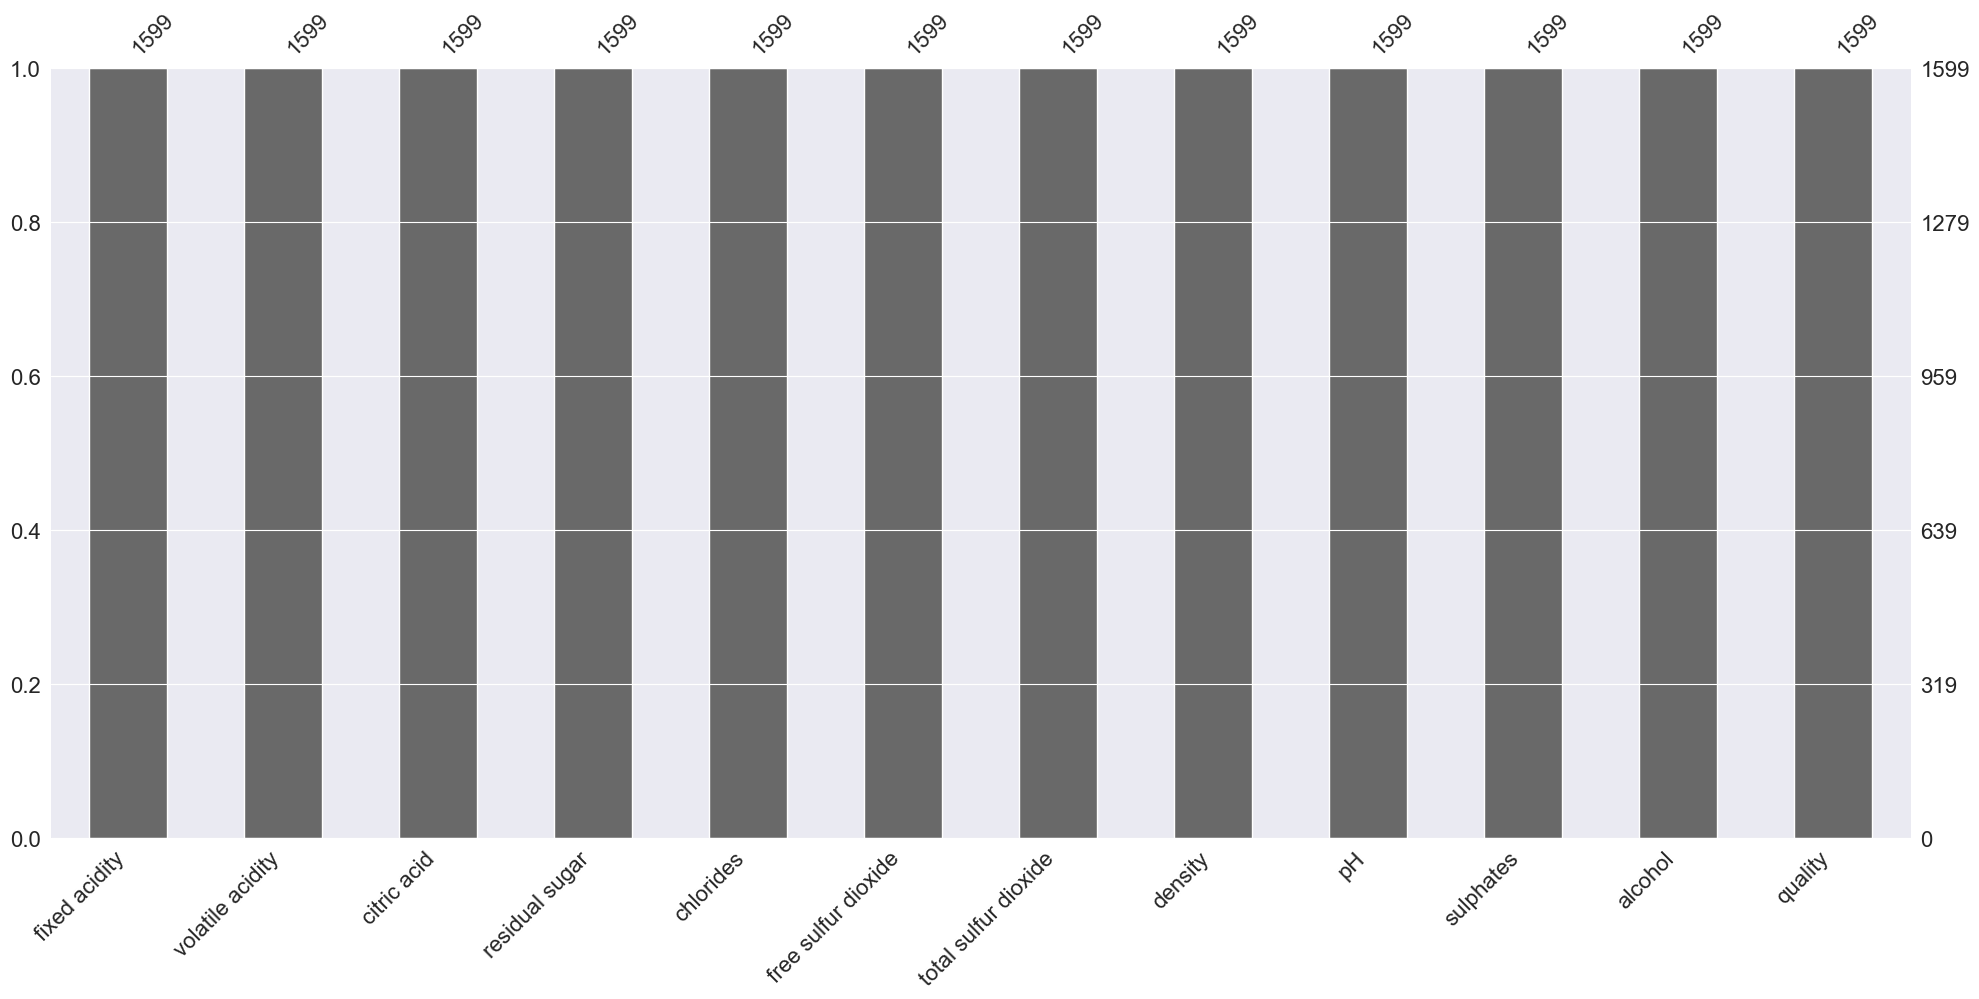

In [38]:
msno.bar(df)

In [30]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<big>Классификация</big>

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

<Axes: xlabel='quality', ylabel='count'>

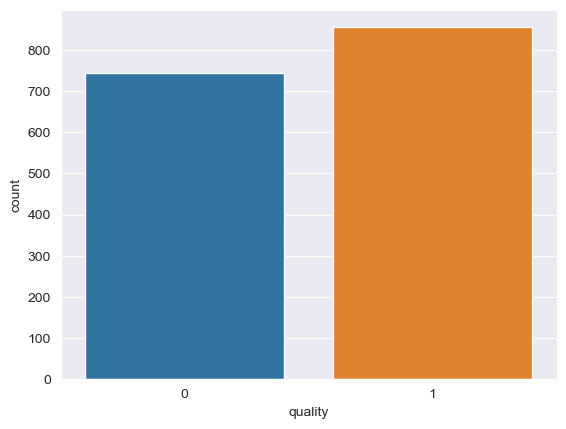

In [32]:
df["quality"] = [1 if value >= 6 else 0 for value in df["quality"].values]
sns.countplot(df, x='quality' )


In [33]:
X = df.iloc[:, df.columns != "quality"]
y = df.iloc[:, df.columns == "quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [34]:
rf = RandomForestClassifier()
rf.fit(X.values, y.values.ravel())
rf_pred = rf.predict(X_test.values)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       267

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



<big>Регрессия</big>

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [48]:
X = df.iloc[:, df.columns != "quality"]
y = df.iloc[:, df.columns == "quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [49]:
rf = RandomForestRegressor()
rf.fit(X.values, y.values.ravel())
rf_pred = rf.predict(X_test.values)
# print(classification_report(y_test, rf_pred))
print(f"MAE: {mean_absolute_error(rf_pred, y_test)}")
print(f"MAPE: {mean_absolute_percentage_error(rf_pred, y_test)}")

MAE: 0.1568958333333333
MAPE: 0.027935487720333697
